In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import os
import plotting

In [2]:
def createfig(nrows=2,figsize=(8,5),nraxs=2,hspace=0.6):
    fig = plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(nrows=nrows, ncols=1, hspace=hspace)
    axs = [0]*nraxs
    
    for i in range(len(axs)):
        axs[i] = fig.add_subplot(gs[i])
    return fig,axs

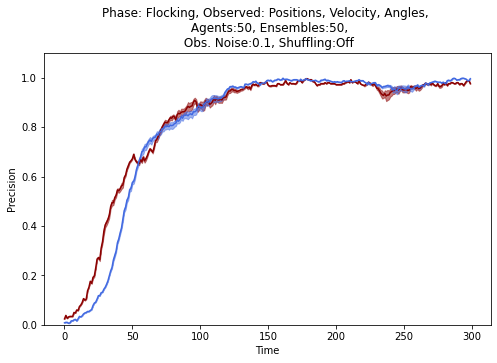

In [3]:
# Single Case Example for one Experiment

experiment = 'Flocking_1111_50_50_0.1_False'

fig,axs = createfig(nrows=1,nraxs=1)

plotting.plot_metric(axs[0],experiment,color='darkred')
plotting.plot_metric(axs[0],experiment,metric='Average LPP')



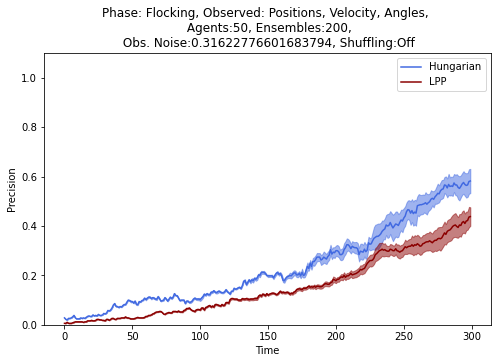

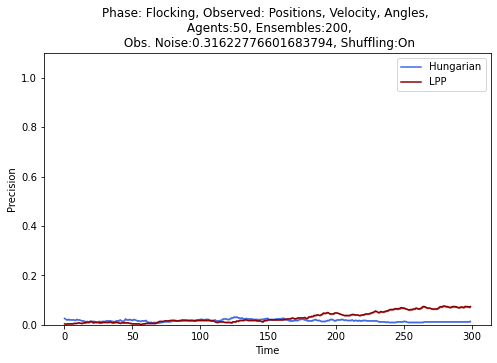

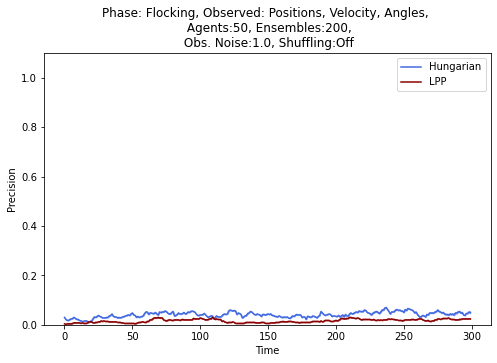

In [4]:
experiments = plotting.get_experiments('../saves/')

for exp in experiments[50:53]:
    
    fig,axs = createfig(nrows=1,nraxs=1)

    plotting.plot_metric(axs[0],exp,label='Hungarian',legend=True)
    plotting.plot_metric(axs[0],exp,metric='Average LPP',legend=True,color='darkred',label='LPP')
    del fig,axs

In [5]:
# The Parameter Ranges

test_observable_axis = [(True,True,True,True),(True,True,True,False),(True,True,False,False)]
test_ensembles = [50,100,150,200,250]
test_observation_noise = np.logspace(-4,0,9) #starts at 1e-4
test_shuffle = [True,False]

In [9]:
def get_M(phase='Flocking',agents='50',obs='1111',shuffle='False'):
    """
    Input: Number of Agents, Sampling Rate and Observed Axis
    Output: Matrix for Imshow. X-Axis: Ensemble Size, Y-Axis: Measurement Noise, Color: Mean Precision
    """

    title = f'Phase: {phase} \nAgents: {agents}, Shuffling: {shuffle}'
    
    M = np.zeros([len(test_observation_noise),len(test_ensembles)])

    for i,nr_ensemble in enumerate(test_ensembles):

        for j,noise in enumerate(test_observation_noise):
      
            exp = f"{phase}_{obs}_{agents}_{nr_ensemble}_{noise}_{shuffle}"    

            h = plotting.get_avg_metric(exp)
            M[len(test_observation_noise)-1-j,i] = h


    return M, title 

In [10]:
def plot_M(ax,axcb,M,title=None,agents='100',obs='110',shuffle='False'):
    """
    Input: Axis for plotting and for the colorbar, Matrix to be plotted
    """
    
    x1 = np.min(test_ensembles)-((test_ensembles[-1]-test_ensembles[-2])/2)
    x2 = np.max(test_ensembles)+((test_ensembles[-1]-test_ensembles[-2])/2)
    y1 = 1.125*np.log10(0.0001)
    y2 = 0.5
    
    show=ax.imshow(M,aspect='auto',cmap='RdBu',vmin=0,vmax=1,extent=(x1,x2,y1,y2))

    ax.set_xlabel('Kalman Ensemble Size')
    ax.set_xticks(test_ensembles)

    ax.set_ylabel('Observation Noise (Log10)')
    ax.set_yticks(np.log10(test_observation_noise[::2]))
    
    ax.set_title(title,size=10)


    axcb.axis('off')
    cbar = fig.colorbar(show,ax=axcb,orientation='vertical',location='right',fraction=1)
    cbar.set_ticks([0,0.25,0.5,0.75,1])
    cbar.set_label('Hungarian Precision',rotation=270,labelpad=12)
    return None

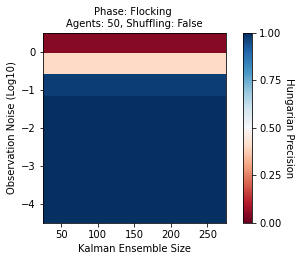

In [14]:
M,title = get_M(phase='Flocking',agents='50',obs='1111',shuffle='False')

fig = plt.figure(figsize=(4.4,3.5))
gs = gridspec.GridSpec(nrows=1, ncols=2, wspace=0.15, width_ratios=[4,1])
axs = [0]*2
for i in range(len(axs)):
    axs[i] = fig.add_subplot(gs[i])

plot_M(axs[0],axs[1],M,title=title)

### 1 D Visualisation (With Error bars)

In [15]:
def get_noise_dep(nr_ensembles,metric='Average Hungarian Precision',phase='Flocking',obs='1111',shuffle='False'):

    x_ax = test_observation_noise
    y_ax = []

    for noise in test_observation_noise:
        exp = f"{phase}_{obs}_50_{nr_ensembles}_{noise}_{shuffle}"  
        
        y_ax.append(plotting.get_avg_metric(exp,metric=metric))

    return x_ax,y_ax


In [19]:
def plot_noise_dep(\
        ax,\
        nr_ensembles,\
        color='royalblue',\
        metric='Average Hungarian Precision',\
        phase='Flocking',\
        obs='1111',\
        shuffle='False'):

    title = f'Phase: {phase} \nAgents: 50, Shuffling: {shuffle}'
    
    x,y = get_noise_dep(nr_ensembles)
    ax.scatter(x,y,s=8)
    ax.set_xscale('log')

    ax.set_xlabel('Observation Noise')
    ax.set_ylabel('Precision')

    return None

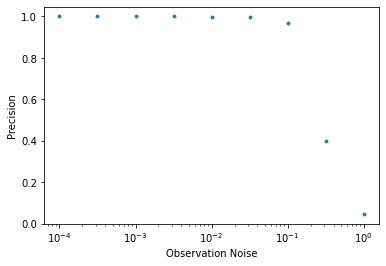

In [20]:
fig,ax = plt.subplots()

plot_noise_dep(ax,50)